## Inferring
#### In this lesson, you will infer sentiment and topics from product reviews and news articles.

### Setup

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### Product review text

In [1]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

### Sentiment (positive/negative)

In [ ]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

output:

The sentiment of the product review is positive.

In [ ]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

Output:  positive

### Identify types of emotions

In [ ]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

output:

happy, satisfied, grateful, impressed, content

#### identify anger

In [ ]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

output: No

### Extract product and company name from customer reviews

In [ ]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

Output:

{
  "Item": "lamp",
  "Brand": "Lumina"
}

### Doing multiple tasks at once

In [ ]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

Output: {
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp with additional storage",
  "Brand": "Lumina"
}

### Inferring topics

In [2]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

In [ ]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

Output:

['government survey',
 ' job satisfaction',
 ' NASA',
 ' Social Security Administration',
 ' employee concerns']

In [3]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

In [4]:
topic_list

['nasa',
 'local government',
 'engineering',
 'employee satisfaction',
 'federal government']

### Make a news alert for certain topics

In [ ]:
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

output:

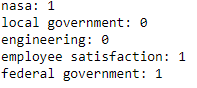

In [ ]:
topic_dict = {i.split(': ')[0]: int(i.split(': ')[1]) for i in response.split(sep='\n')}
if topic_dict['nasa'] == 1:
    print("ALERT: New NASA story!")

Output:

ALERT: New NASA story!